# Installing packages

# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy import stats
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from termcolor import colored

In [2]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
 # calculate means
 mean1, mean2 = mean(data1), mean(data2)
 # calculate standard errors
 se1, se2 = sem(data1), sem(data2)
 # standard error on the difference between the samples
 sed = sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
 t_stat = (mean1 - mean2) / sed
 # degrees of freedom
 df = len(data1) + len(data2) - 2
 # calculate the critical value
 cv = t.ppf(1.0 - alpha, df)
 # calculate the p-value
 p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
 # return everything
 return t_stat, df, cv, p

## Toy Samples

In [3]:
mu2, sigma2 = 25, 5 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 5000)
mu, sigma = 30, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)
zz = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

# Population

In [4]:
df = pd.read_excel('carcass_2025_may.xlsx')
df['Group'] = df['Amostra'].apply(lambda x: x[0])
df['Day'] = df['Amostra'].apply(lambda x: int(x[1]) if x[1] != 'u' else 0)
df.head()

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,18.775573,18.963344,17.177976,A,1
1,A1-1,18.920009,19.338920,17.091254,A,1
2,A1-2,20.211616,18.745307,18.418143,A,1
3,A1-2,20.322960,18.720468,18.544089,A,1
4,A1-3,19.438388,19.222017,19.027565,A,1


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df[df['VG'].isna()]

,Amostra,RPL32,VGR,VG,Group,Day


In [7]:
# df[df['Amostra'] == 'Pu-1']['VG'].mean() 

In [8]:
# df[df['Amostra'] == 'Pu-1']['VG'] = df[df['Amostra'] == 'Pu-1']['VG'].mean() 

In [9]:
df.groupby(['Group', 'Day']).count()

Amostra  RPL32  VGR  VG
Group Day                         
A     1          8      8    8   8
      4          8      8    8   8
      8          8      8    8   8
B     1          8      8    8   8
      4          8      8    8   8
      8          8      8    8   8
C     1          8      8    8   8
      4          8      8    8   8
      8          8      8    8   8
D     1          8      8    8   8
      4          8      8    8   8
      8          8      8    8   8

In [10]:
df.describe()

,RPL32,VGR,VG,Day
count,96.000000,96.000000,96.000000,96.000000
mean,18.492960,18.060528,17.011660,4.333333
std,0.958263,1.527870,1.209469,2.882494
min,16.761689,15.663976,14.808748,1.000000
25%,17.727820,17.231205,16.066577,1.000000
50%,18.582437,17.790110,16.853324,4.000000
75%,19.086116,18.812220,17.827476,8.000000
max,20.679713,22.925396,20.729794,8.000000


In [11]:
df_backup = df.copy()

In [12]:
df.head()

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,18.775573,18.963344,17.177976,A,1
1,A1-1,18.920009,19.338920,17.091254,A,1
2,A1-2,20.211616,18.745307,18.418143,A,1
3,A1-2,20.322960,18.720468,18.544089,A,1
4,A1-3,19.438388,19.222017,19.027565,A,1


In [13]:
df = df.groupby(['Amostra', 'Group', 'Day']).mean().reset_index()

In [14]:
df

,Amostra,Group,Day,RPL32,VGR,VG
0,A1-1,A,1,18.847791,19.151132,17.134615
1,A1-2,A,1,20.267288,18.732887,18.481116
2,A1-3,A,1,19.285311,19.087453,19.059297
3,A1-4,A,1,18.674973,19.196372,16.843559
4,A4-1,A,4,18.875651,18.765094,17.931921
5,A4-2,A,4,19.833278,18.621977,18.015363
6,A4-3,A,4,17.855012,19.202752,17.038085
7,A4-4,A,4,18.648799,18.854138,17.018569
8,A8-1,A,8,17.600709,18.048177,20.661437
9,A8-2,A,8,16.823750,22.904750,16.033607


Each distribution is a total of eggs layed during 10 days for each female individual

In [15]:
df['DCT_VG'] =  df['VG'] - df['RPL32']
df['DCT_VGR'] =  df['VGR'] - df['RPL32']
df.head()

,Amostra,Group,Day,RPL32,VGR,VG,DCT_VG,DCT_VGR
0,A1-1,A,1,18.847791,19.151132,17.134615,-1.713176,0.303341
1,A1-2,A,1,20.267288,18.732887,18.481116,-1.786172,-1.534401
2,A1-3,A,1,19.285311,19.087453,19.059297,-0.226015,-0.197858
3,A1-4,A,1,18.674973,19.196372,16.843559,-1.831414,0.521399
4,A4-1,A,4,18.875651,18.765094,17.931921,-0.943731,-0.110557


In [16]:
df['DDCT_VG'] =  df['DCT_VG'] - df['DCT_VG'].min() 
df['DDCT_VGR'] =  df['DCT_VGR'] - df['DCT_VGR'].min()
df.head()

,Amostra,Group,Day,RPL32,VGR,VG,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR
0,A1-1,A,1,18.847791,19.151132,17.134615,-1.713176,0.303341,2.044984,3.442575
1,A1-2,A,1,20.267288,18.732887,18.481116,-1.786172,-1.534401,1.971988,1.604834
2,A1-3,A,1,19.285311,19.087453,19.059297,-0.226015,-0.197858,3.532146,2.941376
3,A1-4,A,1,18.674973,19.196372,16.843559,-1.831414,0.521399,1.926746,3.660633
4,A4-1,A,4,18.875651,18.765094,17.931921,-0.943731,-0.110557,2.814430,3.028677


In [17]:
df['EXP_DDCT_VG'] =  df['DDCT_VG'].apply(lambda x: 2**(-x)) 
df['EXP_DDCT_VGR'] =  df['DDCT_VGR'].apply(lambda x: 2**(-x)) 
df.head()

,Amostra,Group,Day,RPL32,VGR,VG,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,A,1,18.847791,19.151132,17.134615,-1.713176,0.303341,2.044984,3.442575,0.242325,0.091977
1,A1-2,A,1,20.267288,18.732887,18.481116,-1.786172,-1.534401,1.971988,1.604834,0.254901,0.328774
2,A1-3,A,1,19.285311,19.087453,19.059297,-0.226015,-0.197858,3.532146,2.941376,0.086441,0.130184
3,A1-4,A,1,18.674973,19.196372,16.843559,-1.831414,0.521399,1.926746,3.660633,0.263022,0.079075
4,A4-1,A,4,18.875651,18.765094,17.931921,-0.943731,-0.110557,2.814430,3.028677,0.142158,0.122540


## Sanity Test

In [18]:
def interpret_ttest(a, b, alpha=0.05):
    t_stat, df, cv, p = independent_ttest(a, b, alpha)
    print('t=%.3f, df=%d, cv=%.5f, p=%.8f' % (t_stat, df, cv, p))
#     # interpret via critical value
#     if abs(t_stat) <= cv:
#         print('Accept null hypothesis (Same distributions).')
#     else:
#         print('Reject the null hypothesis (Different distributions).')
    # interpret via p-value
    if p > alpha:
        print(colored('Accept null hypothesis (Same distributions).', 'green'))
    else:
        print(colored('Reject the null hypothesis (Different distributions).', 'red'))

In [19]:
interpret_ttest(s,s2)

t=50.145, df=9998, cv=1.64501, p=0.00000000
Reject the null hypothesis (Different distributions).


In [20]:
def interpret_kwtest(a, b, alpha = 0.05):
    stat, p = stats.kruskal(a, b)
    print('Statistics=%.3f, p=%.8f' % (stat, p))
    # interpret

    if p > alpha:
        print(colored('Same distributions (fail to reject H0)', 'green'))
    else:
        print(colored('Different distributions (reject H0)', 'red'))

In [21]:
interpret_kwtest(s,s2)

Statistics=2037.081, p=0.00000000
Different distributions (reject H0)


In [22]:
from scipy.stats import shapiro
# normality test
# interpret results
def interpret_normaltest(data, alpha=0.05):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    if p > alpha:
        print(colored('Sample looks Gaussian (fail to reject H0)', 'green'))
    else:
        print(colored('Sample does not look Gaussian (reject H0)', 'red'))



In [23]:
interpret_normaltest(s)

Statistics=1.000, p=0.643
Sample looks Gaussian (fail to reject H0)


In [24]:
interpret_normaltest(s2)

Statistics=1.000, p=0.784
Sample looks Gaussian (fail to reject H0)


In [25]:
interpret_normaltest(zz)

Statistics=0.236, p=0.000
Sample does not look Gaussian (reject H0)


## Normality Tests

In [26]:
df.head()

,Amostra,Group,Day,RPL32,VGR,VG,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,A,1,18.847791,19.151132,17.134615,-1.713176,0.303341,2.044984,3.442575,0.242325,0.091977
1,A1-2,A,1,20.267288,18.732887,18.481116,-1.786172,-1.534401,1.971988,1.604834,0.254901,0.328774
2,A1-3,A,1,19.285311,19.087453,19.059297,-0.226015,-0.197858,3.532146,2.941376,0.086441,0.130184
3,A1-4,A,1,18.674973,19.196372,16.843559,-1.831414,0.521399,1.926746,3.660633,0.263022,0.079075
4,A4-1,A,4,18.875651,18.765094,17.931921,-0.943731,-0.110557,2.814430,3.028677,0.142158,0.122540


In [27]:
groups = df.Group.unique()
groups

array(['A', 'B', 'C', 'D'], dtype=object)

In [28]:
distributions_vg  = {g: df[df['Group'] == g]['EXP_DDCT_VG'].values for g in groups}
distributions_vgr  = {g: df[df['Group'] == g]['EXP_DDCT_VGR'].values for g in groups}

## Normality Test for VG 

In [29]:
df

,Amostra,Group,Day,RPL32,VGR,VG,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,A,1,18.847791,19.151132,17.134615,-1.713176,0.303341,2.044984,3.442575,0.242325,0.091977
1,A1-2,A,1,20.267288,18.732887,18.481116,-1.786172,-1.534401,1.971988,1.604834,0.254901,0.328774
2,A1-3,A,1,19.285311,19.087453,19.059297,-0.226015,-0.197858,3.532146,2.941376,0.086441,0.130184
3,A1-4,A,1,18.674973,19.196372,16.843559,-1.831414,0.521399,1.926746,3.660633,0.263022,0.079075
4,A4-1,A,4,18.875651,18.765094,17.931921,-0.943731,-0.110557,2.814430,3.028677,0.142158,0.122540
5,A4-2,A,4,19.833278,18.621977,18.015363,-1.817915,-1.211300,1.940246,1.927934,0.260572,0.262805
6,A4-3,A,4,17.855012,19.202752,17.038085,-0.816927,1.347740,2.941234,4.486974,0.130197,0.044595
7,A4-4,A,4,18.648799,18.854138,17.018569,-1.630230,0.205339,2.127930,3.344574,0.228786,0.098443
8,A8-1,A,8,17.600709,18.048177,20.661437,3.060728,0.447468,6.818889,3.586702,0.008857,0.083233
9,A8-2,A,8,16.823750,22.904750,16.033607,-0.790143,6.080999,2.968017,9.220234,0.127802,0.001677


In [30]:
color_map = {
    'P': 'black', 
    'A': 'Green', 
    'B': 'Blue', 
    'C': 'Red', 
    'D': 'Yellow'}

In [31]:
df_day_stats = df.groupby(['Group', 'Day']).describe().reset_index()
df_day_stats.columns = ['_'.join(tuple(map(str, t))) for t in df_day_stats.columns.values]
df_day_stats['EXP_DDCT_VG_error'] = df_day_stats['EXP_DDCT_VG_std'] / (df_day_stats['EXP_DDCT_VG_count']**(1/2))
df_day_stats['EXP_DDCT_VGR_error'] = df_day_stats['EXP_DDCT_VGR_std'] / (df_day_stats['EXP_DDCT_VGR_count']**(1/2))
df_day_stats['GroupDay'] = df_day_stats['Group_'].astype(str) + df_day_stats['Day_'].astype(str)
df_day_stats['Color'] = df_day_stats['Group_'].map(lambda x: color_map[x])

df_day_stats.to_excel('carcass_stats.xlsx')
df_day_stats[['GroupDay',  'EXP_DDCT_VG_error', 'EXP_DDCT_VGR_error', 'EXP_DDCT_VGR_mean', 'EXP_DDCT_VG_mean', 'EXP_DDCT_VGR_std', 'EXP_DDCT_VGR_max', 'EXP_DDCT_VGR_50%']]


,GroupDay,EXP_DDCT_VG_error,EXP_DDCT_VGR_error,EXP_DDCT_VGR_mean,EXP_DDCT_VG_mean,EXP_DDCT_VGR_std,EXP_DDCT_VGR_max,EXP_DDCT_VGR_50%
0,A1,0.041960,0.058112,0.157503,0.211672,0.116225,0.328774,0.111081
1,A4,0.032080,0.046516,0.132096,0.190428,0.093033,0.262805,0.110491
2,A8,0.033005,0.017010,0.047171,0.092149,0.034021,0.083233,0.051888
3,B1,0.038364,0.014751,0.035262,0.211948,0.029501,0.078725,0.024602
4,B4,0.094316,0.018876,0.098619,0.197083,0.037752,0.148597,0.094190
5,B8,0.210453,0.073983,0.202060,0.381258,0.147966,0.328616,0.230512
6,C1,0.055151,0.046017,0.368588,0.286707,0.092033,0.505034,0.328624
7,C4,0.050305,0.064743,0.278263,0.272257,0.129487,0.413687,0.293209
8,C8,0.065306,0.134799,0.515704,0.249676,0.269598,0.797995,0.527791
9,D1,0.046560,0.050330,0.232455,0.538279,0.100660,0.321134,0.249526


In [32]:
df_day_stats

,Group_,Day_,RPL32_count,RPL32_mean,RPL32_std,RPL32_min,RPL32_25%,RPL32_50%,RPL32_75%,RPL32_max,...,EXP_DDCT_VGR_std,EXP_DDCT_VGR_min,EXP_DDCT_VGR_25%,EXP_DDCT_VGR_50%,EXP_DDCT_VGR_75%,EXP_DDCT_VGR_max,EXP_DDCT_VG_error,EXP_DDCT_VGR_error,GroupDay,Color
0,A,1,4.0,19.268841,0.713473,18.674973,18.804587,19.066551,19.530805,20.267288,...,0.116225,0.079075,0.088752,0.111081,0.179831,0.328774,0.041960,0.058112,A1,Green
1,A,4,4.0,18.803185,0.814291,17.855012,18.450352,18.762225,19.115058,19.833278,...,0.093033,0.044595,0.084981,0.110491,0.157606,0.262805,0.032080,0.046516,A4,Green
2,A,8,4.0,17.230149,0.432782,16.823750,16.872205,17.244532,17.602476,17.607779,...,0.034021,0.001677,0.035312,0.051888,0.063748,0.083233,0.033005,0.017010,A8,Green
3,B,1,4.0,17.748544,0.461089,17.310179,17.491328,17.648785,17.906001,18.386426,...,0.029501,0.013121,0.020615,0.024602,0.039250,0.078725,0.038364,0.014751,B1,Blue
4,B,4,4.0,17.655421,0.345959,17.349412,17.359470,17.649807,17.945757,17.972658,...,0.037752,0.057498,0.081355,0.094190,0.111454,0.148597,0.094316,0.018876,B4,Blue
5,B,8,4.0,18.069267,1.004342,16.833258,17.460503,18.267732,18.876496,18.908346,...,0.147966,0.018599,0.113920,0.230512,0.318651,0.328616,0.210453,0.073983,B8,Blue
6,C,1,4.0,19.137853,0.447320,18.769417,18.925988,18.996526,19.208392,19.788945,...,0.092033,0.312068,0.313827,0.328624,0.383384,0.505034,0.055151,0.046017,C1,Red
7,C,4,4.0,17.745493,0.477495,17.117063,17.575041,17.798175,17.968626,18.268557,...,0.129487,0.112948,0.213836,0.293209,0.357637,0.413687,0.050305,0.064743,C4,Red
8,C,8,4.0,18.304163,0.266776,17.973711,18.179906,18.315083,18.439340,18.612775,...,0.269598,0.209241,0.336721,0.527791,0.706774,0.797995,0.065306,0.134799,C8,Red
9,D,1,4.0,19.233078,0.299654,18.902921,19.103200,19.200430,19.330308,19.628532,...,0.100660,0.109636,0.170609,0.249526,0.311372,0.321134,0.046560,0.050330,D1,Yellow


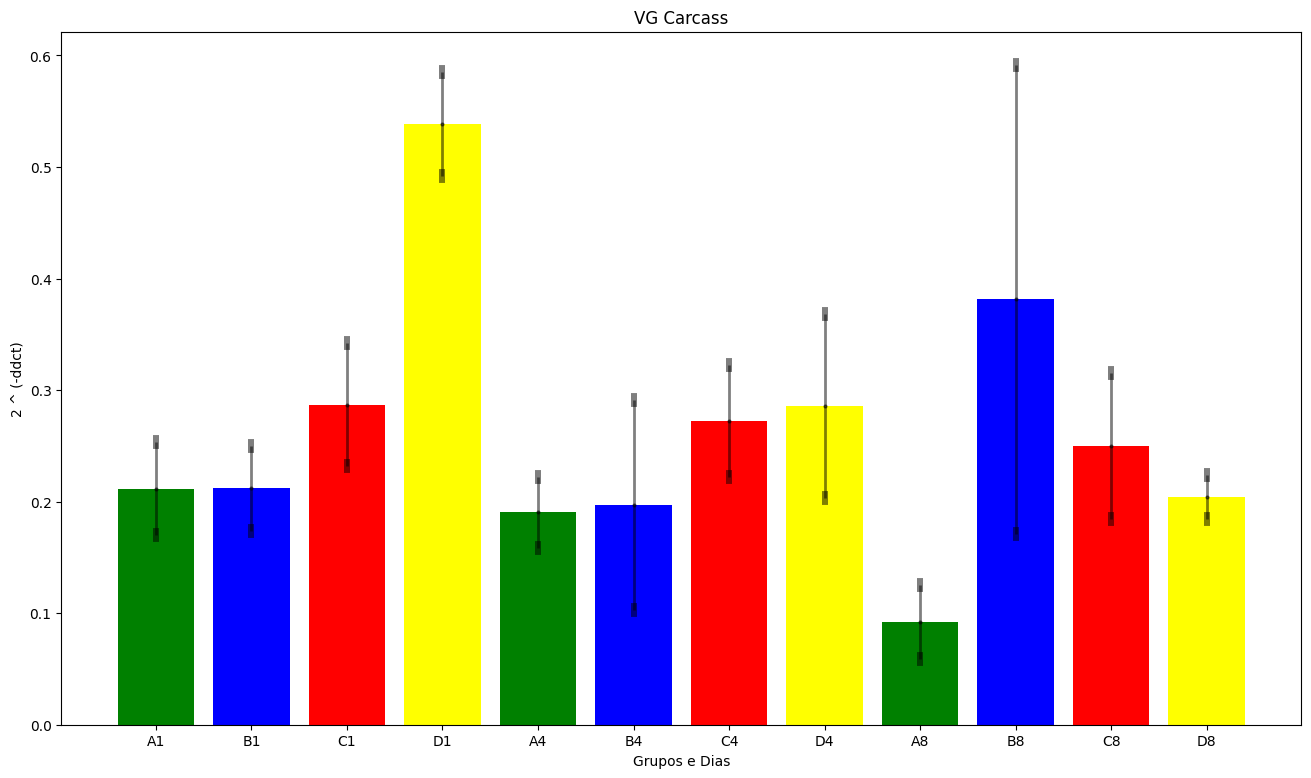

In [33]:
import matplotlib.pyplot as plt 
width = 16
height = 9
plt.figure(figsize=(width, height))
plt.title('VG Carcass')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
target_col = 'EXP_DDCT_VG'
for d in [0, 1, 4, 8]: 
    df_plot = df_day_stats[df_day_stats.Day_ == d]
    plt.bar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, color=df_plot['Color'].values)
    plt.errorbar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, df_plot[f'{target_col}_error'].values, fmt='.', 
                 color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    
plt.savefig('vg_carcass_big.png', dpi=400, transparent=True)
plt.show()

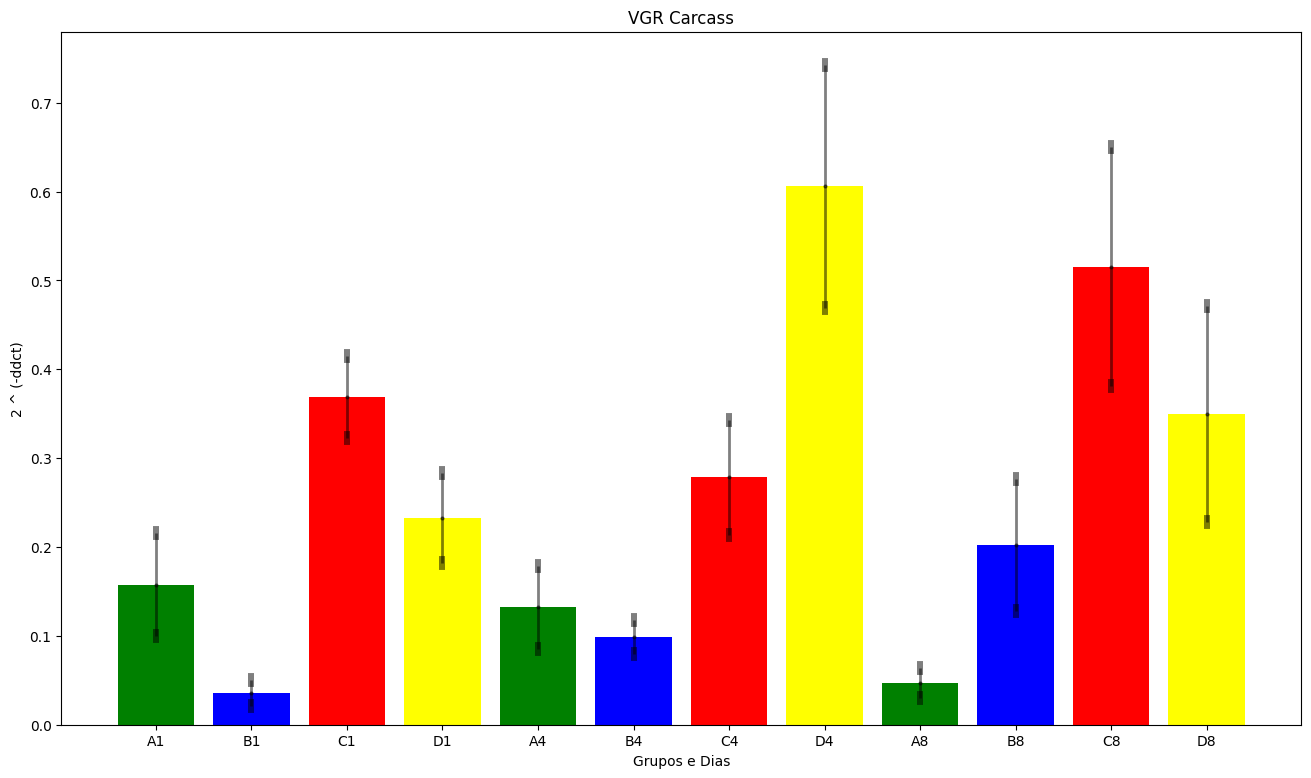

In [34]:
import matplotlib.pyplot as plt 
width = 16
height = 9
plt.figure(figsize=(width, height))
plt.title('VGR Carcass')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
target_col = 'EXP_DDCT_VGR'
for d in [0, 1, 4, 8]: 
    df_plot = df_day_stats[df_day_stats.Day_ == d]
    plt.bar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, color=df_plot['Color'].values)
    plt.errorbar(df_plot['GroupDay'].values, df_plot[f'{target_col}_mean'].values, df_plot[f'{target_col}_error'].values, fmt='.', 
                 color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    
plt.savefig('VGR_Carcass_big.png', dpi=400, transparent=True)
plt.show()

<Axes: xlabel='Day', ylabel='EXP_DDCT_VG'>

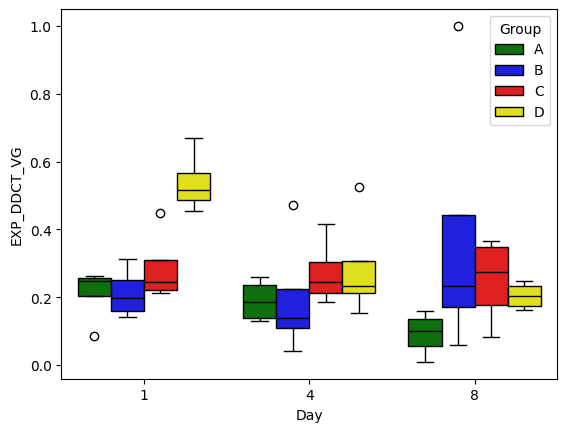

In [35]:
import seaborn as sns
sns.boxplot(data=df, x="Day", y="EXP_DDCT_VG", hue="Group", palette=color_map)


<Axes: xlabel='Day', ylabel='EXP_DDCT_VGR'>

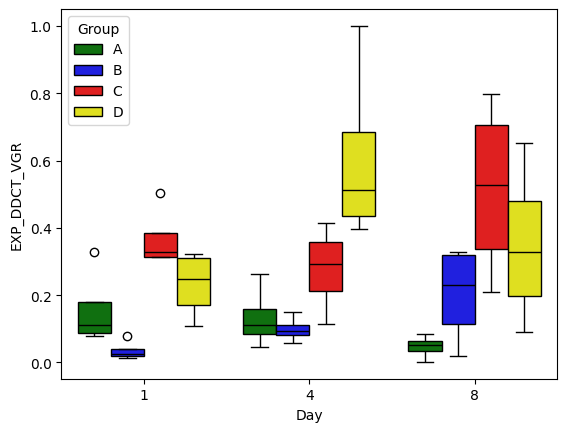

In [36]:
import seaborn as sns
sns.boxplot(data=df, x="Day", y="EXP_DDCT_VGR", hue="Group", palette=color_map)


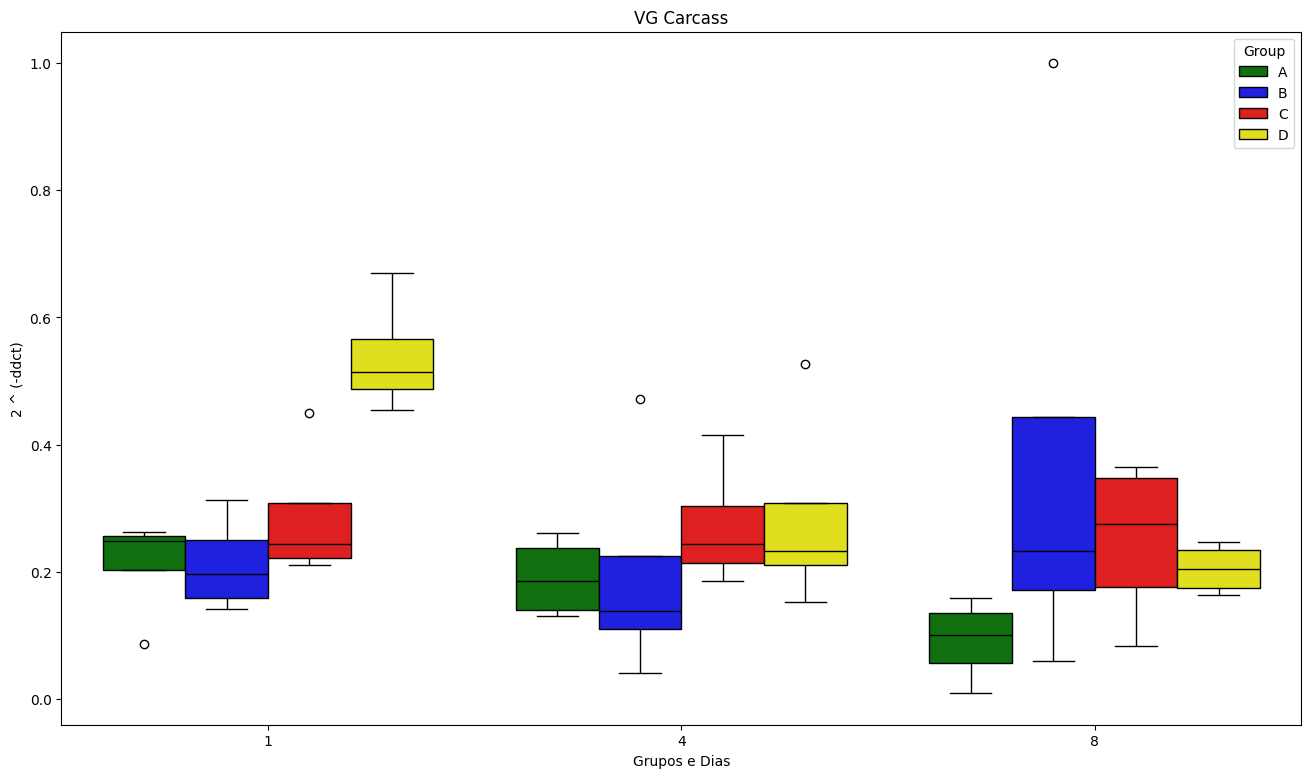

In [37]:
import seaborn as sns
plt.figure(figsize=(width, height))
plt.title('VG Carcass')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
sns.boxplot(data=df, x="Day", y="EXP_DDCT_VG", hue="Group", palette=color_map)
plt.savefig('vg_carcass.png')
plt.savefig('vg_carcass.pdf')

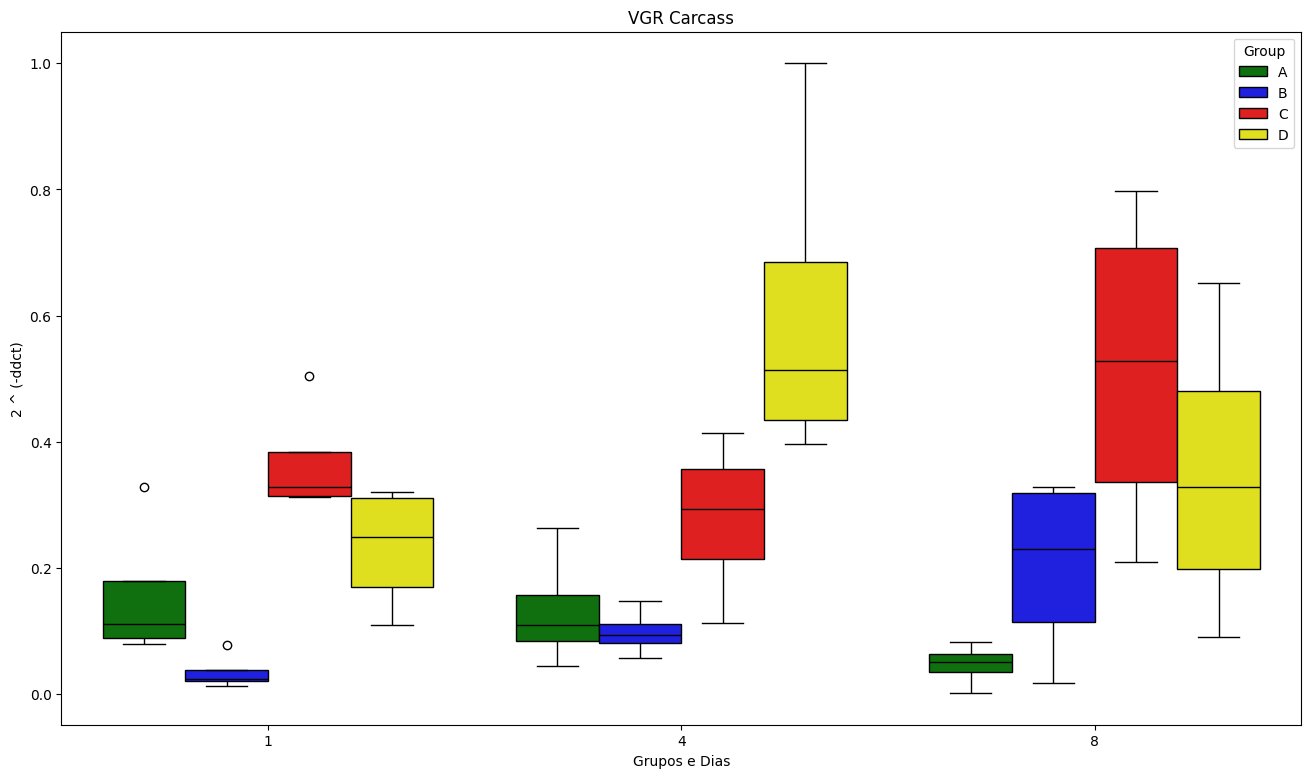

In [38]:
import seaborn as sns
plt.figure(figsize=(width, height))
plt.title('VGR Carcass')
plt.xlabel('Grupos e Dias')
plt.ylabel('2 ^ (-ddct)')
sns.boxplot(data=df, x="Day", y="EXP_DDCT_VGR", hue="Group", palette=color_map)
plt.savefig('vgr_carcass.pdf')
plt.savefig('vgr_carcass.png')

In [39]:
df.to_excel('carcass_exp_ddct.xlsx')

In [40]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in distributions_vg.items():
    print(f'Distributions {k}')
    interpret_normaltest(v)
#     plt.hist(v, bins=7)
#     plt.gca().set(ylabel='Frequency')
#     plt.title(k)
#     plt.show()
    print('\n\n')

Distributions A
Statistics=0.915, p=0.244
Sample looks Gaussian (fail to reject H0)



Distributions B
Statistics=0.724, p=0.001
Sample does not look Gaussian (reject H0)



Distributions C
Statistics=0.951, p=0.653
Sample looks Gaussian (fail to reject H0)



Distributions D
Statistics=0.856, p=0.043
Sample does not look Gaussian (reject H0)





## Normality Test for VGR


Distributions A
Statistics=0.832, p=0.022
Sample does not look Gaussian (reject H0)


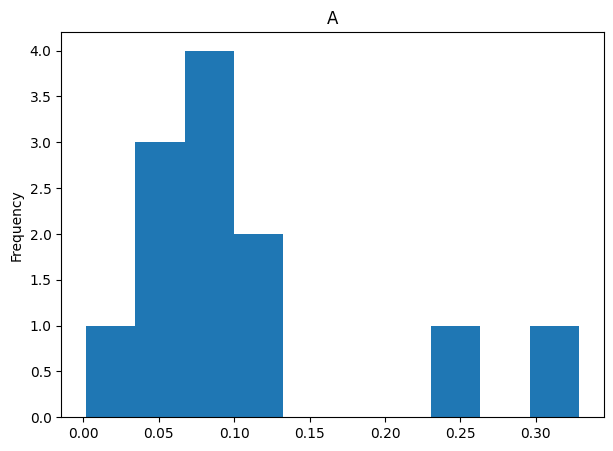




Distributions B
Statistics=0.812, p=0.013
Sample does not look Gaussian (reject H0)


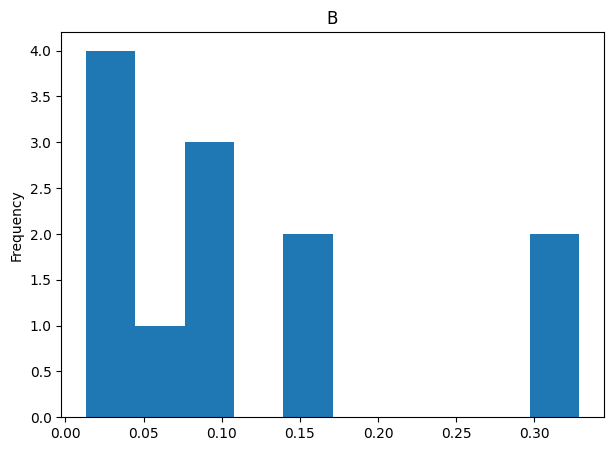




Distributions C
Statistics=0.920, p=0.283
Sample looks Gaussian (fail to reject H0)


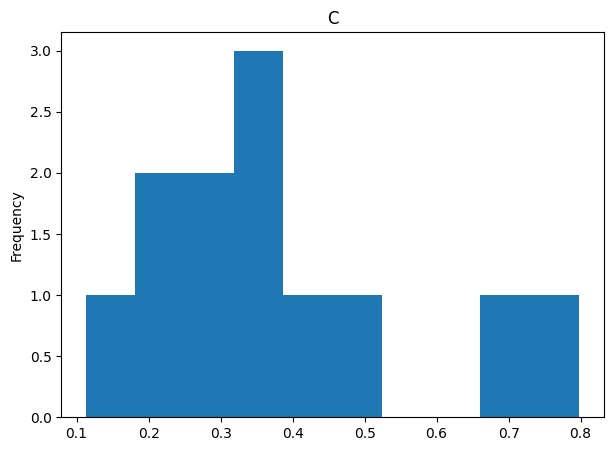




Distributions D
Statistics=0.919, p=0.279
Sample looks Gaussian (fail to reject H0)


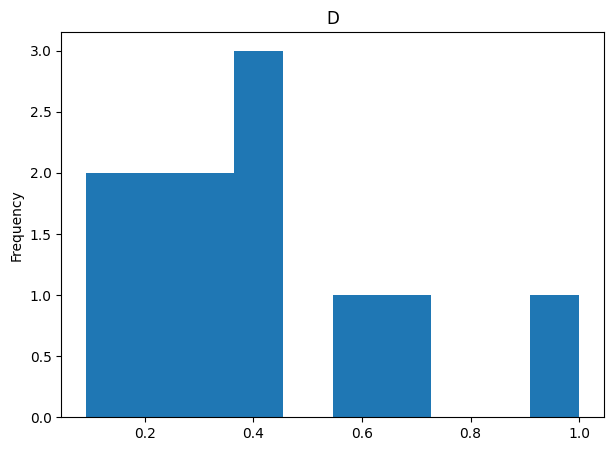

In [41]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in distributions_vgr.items():
    print(f'Distributions {k}')
    interpret_normaltest(v)
    plt.hist(v, bins=10)
    plt.gca().set(ylabel='Frequency')
    plt.title(k)
    plt.show()
    print('\n\n')

## Comparison Scenarios

In [42]:
scenarios_vgr_inter_group = {
'A-B': (distributions_vgr['A'], distributions_vgr['B']), 
'A-C': (distributions_vgr['A'], distributions_vgr['C']), 
'A-D': (distributions_vgr['A'], distributions_vgr['D']), 
'B-C': (distributions_vgr['B'], distributions_vgr['C']), 
'B-D': (distributions_vgr['B'], distributions_vgr['D']), 
'C-D': (distributions_vgr['C'], distributions_vgr['D']), 
}

In [43]:
intra_group_days = [(1,4) ,
(1,8),
(4,8)]


In [44]:
scenarios_vgr_intra_groups = { f'{g}-{d[0]}-{d[1]}': 
                             (df[(df['Group'] == g) & (df['Day'] == d[0])]['VGR'].values, 
                              df[(df['Group'] == g) & (df['Day'] == d[1])]['VGR'].values)
                              for g in distributions_vgr.keys() for d in intra_group_days}

In [45]:
scenarios_vg_inter_group = {
'A-B': (distributions_vg['A'], distributions_vg['B']), 
'A-C': (distributions_vg['A'], distributions_vg['C']), 
'A-D': (distributions_vg['A'], distributions_vg['D']), 
'B-C': (distributions_vg['B'], distributions_vg['C']), 
'B-D': (distributions_vg['B'], distributions_vg['D']), 
'C-D': (distributions_vg['C'], distributions_vg['D']), 
}

In [46]:
scenarios_vg_intra_groups = { f'{g}-{d[0]}-{d[1]}': 
                             (df[(df['Group'] == g) & (df['Day'] == d[0])]['VG'].values, 
                              df[(df['Group'] == g) & (df['Day'] == d[1])]['VG'].values)
                              for g in distributions_vgr.keys() for d in intra_group_days}

In [47]:
scenarios_vg_inter_group['A-B']

(array([0.24232507, 0.25490147, 0.08644068, 0.26302172, 0.14215829,
        0.26057203, 0.13019682, 0.22878582, 0.00885747, 0.12780204,
        0.1591469 , 0.07278844]),
 array([0.22937479, 0.16369476, 0.31266896, 0.14205452, 0.14264539,
        0.13364759, 0.04059822, 0.47144022, 0.06020003, 0.25749614,
        1.        , 0.20733703]))

In [48]:
scenarios_vg_intra_groups['A-1-4']

(array([17.13461502, 18.48111578, 19.05929666, 16.84355898]),
 array([17.93192072, 18.01536306, 17.03808539, 17.01856888]))

In [49]:
scenarios_vgr_inter_group['A-B']

(array([0.0919775 , 0.32877354, 0.13018395, 0.07907506, 0.12253986,
        0.26280523, 0.044595  , 0.09844257, 0.0832329 , 0.00167661,
        0.04652316, 0.05725324]),
 array([0.02311246, 0.02609148, 0.07872492, 0.01312101, 0.0574982 ,
        0.08930778, 0.09907252, 0.14859711, 0.3153297 , 0.32861627,
        0.01859911, 0.14569367]))

In [50]:
scenarios_vgr_intra_groups['A-1-4']

(array([19.15113184, 18.7328873 , 19.08745333, 19.19637223]),
 array([18.76509389, 18.62197739, 19.20275188, 18.8541383 ]))

### Statistical Tests VG


#### Inter Group VG

In [51]:
for k, v in scenarios_vg_inter_group.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B
Statistics=0.653, p=0.41892344
Same distributions (fail to reject H0)



Scenario A-C
Statistics=4.320, p=0.03766692
Different distributions (reject H0)



Scenario A-D
Statistics=5.603, p=0.01792634
Different distributions (reject H0)



Scenario B-C
Statistics=1.613, p=0.20402387
Same distributions (fail to reject H0)



Scenario B-D
Statistics=3.000, p=0.08326452
Same distributions (fail to reject H0)



Scenario C-D
Statistics=0.750, p=0.38647623
Same distributions (fail to reject H0)





#### Intra Group VG

In [52]:
for k, v in scenarios_vg_intra_groups.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-1-4
Statistics=0.333, p=0.56370286
Same distributions (fail to reject H0)



Scenario A-1-8
Statistics=0.333, p=0.56370286
Same distributions (fail to reject H0)



Scenario A-4-8
Statistics=0.333, p=0.56370286
Same distributions (fail to reject H0)



Scenario B-1-4
Statistics=0.333, p=0.56370286
Same distributions (fail to reject H0)



Scenario B-1-8
Statistics=0.083, p=0.77282999
Same distributions (fail to reject H0)



Scenario B-4-8
Statistics=0.083, p=0.77282999
Same distributions (fail to reject H0)



Scenario C-1-4
Statistics=4.083, p=0.04330814
Different distributions (reject H0)



Scenario C-1-8
Statistics=0.750, p=0.38647623
Same distributions (fail to reject H0)



Scenario C-4-8
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario D-1-4
Statistics=3.000, p=0.08326452
Same distributions (fail to reject H0)



Scenario D-1-8
Statistics=2.083, p=0.14891467
Same distributions (fail to reject H0)



Scenario D-4-8
Statistics=0.750, p=

### Statistical Tests VGR

#### Inter Group VGR

In [53]:
for k, v in scenarios_vgr_inter_group.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B
Statistics=0.053, p=0.81736133
Same distributions (fail to reject H0)



Scenario A-C
Statistics=12.813, p=0.00034416
Different distributions (reject H0)



Scenario A-D
Statistics=10.453, p=0.00122428
Different distributions (reject H0)



Scenario B-C
Statistics=12.000, p=0.00053201
Different distributions (reject H0)



Scenario B-D
Statistics=10.453, p=0.00122428
Different distributions (reject H0)



Scenario C-D
Statistics=0.030, p=0.86249023
Same distributions (fail to reject H0)





#### Intra Group VGR

In [54]:
for k, v in scenarios_vgr_intra_groups.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-1-4
Statistics=0.333, p=0.56370286
Same distributions (fail to reject H0)



Scenario A-1-8
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario A-4-8
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario B-1-4
Statistics=3.000, p=0.08326452
Same distributions (fail to reject H0)



Scenario B-1-8
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario B-4-8
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario C-1-4
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario C-1-8
Statistics=4.083, p=0.04330814
Different distributions (reject H0)



Scenario C-4-8
Statistics=0.750, p=0.38647623
Same distributions (fail to reject H0)



Scenario D-1-4
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario D-1-8
Statistics=1.333, p=0.24821308
Same distributions (fail to reject H0)



Scenario D-4-8
Statistics=1.333, p=